In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import NuSVC
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv("agaricus-lepiota.data", header=None)

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [25]:
df.info

<bound method DataFrame.info of       0   1   2   3   4   5   6   7   8   9   ...  13  14  15  16  17  18  19  \
0      1   5   2   4   1   6   1   0   1   4  ...   2   7   7   0   2   1   4   
1      0   5   2   9   1   0   1   0   0   4  ...   2   7   7   0   2   1   4   
2      0   0   2   8   1   3   1   0   0   5  ...   2   7   7   0   2   1   4   
3      1   5   3   8   1   6   1   0   1   5  ...   2   7   7   0   2   1   4   
4      0   5   2   3   0   5   1   1   0   4  ...   2   7   7   0   2   1   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
8119   0   3   2   4   0   5   0   0   0  11  ...   2   5   5   0   1   1   4   
8120   0   5   2   4   0   5   0   0   0  11  ...   2   5   5   0   0   1   4   
8121   0   2   2   4   0   5   0   0   0   5  ...   2   5   5   0   1   1   4   
8122   1   3   3   4   0   8   1   0   1   0  ...   1   7   7   0   2   1   0   
8123   0   5   2   4   0   5   0   0   0  11  ...   2   5   5   0   1   1   4

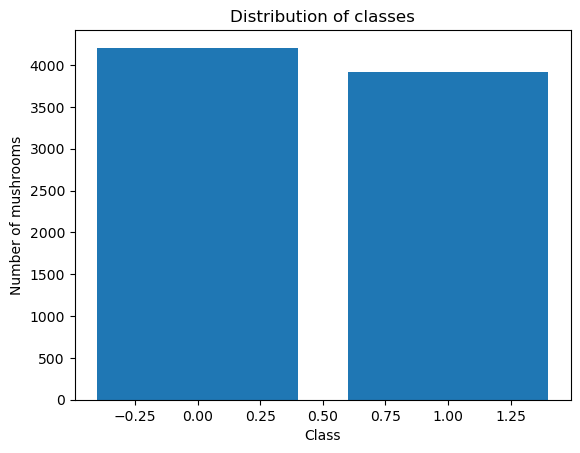

In [27]:
class_count = df[0].value_counts()

plt.bar(class_count.index, class_count.values)
plt.xlabel('Class')
plt.ylabel('Number of mushrooms')
plt.title('Distribution of classes')
plt.show()

In [29]:
missing_values = df.isnull().sum()
missing_values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [4]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [5]:
# Separate features and target variable
X = df.drop(0, axis=1).values
y = df[0].values

In [6]:
# Divide the dataset into 70-30 for training and testing with 10 different samples
n_samples = 10
test_size = 0.3
random_state = 42
accuracies = []

In [7]:
for i in range(n_samples):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    random_state += 1

    # Create the SVM model object
    model = NuSVC(max_iter=1000)

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict the target values for the test set using the trained model
    y_pred = model.predict(X_test)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Sample {i + 1}: Accuracy = {accuracy}")
    print("Best parameters: ", model.get_params())
    print("-" * 80)

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 1: Accuracy = 0.8974569319114027
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 2: Accuracy = 0.8929450369155045
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 3: Accuracy = 0.8917145200984413
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 4: Accuracy = 0.8859721082854799
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 5: Accuracy = 0.8855619360131255
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 6: Accuracy = 0.8896636587366694
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 7: Accuracy = 0.8970467596390485
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 8: Accuracy = 0.8958162428219852
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 9: Accuracy = 0.8814602132895816
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 10: Accuracy = 0.9007383100902379
Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
--------------------------------------------------------------------------------


In [8]:
# Find the sample with maximum accuracy
max_accuracy_index = np.argmax(accuracies)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    random_state=max_accuracy_index + random_state)
model = NuSVC(kernel='rbf', nu=0.5, max_iter=1000)
model.fit(X_train, y_train)

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


NuSVC(max_iter=1000)

In [18]:
print("Best parameters: ", model.get_params())

Best parameters:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'nu': 0.5, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [23]:
# Create the best SVM model object
best_model = NuSVC(kernel='rbf', nu=0.5, max_iter=1000)

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Predict the target values for the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
best_accuracy = accuracy_score(y_test, y_pred)
print("Best accuracy:", best_accuracy)


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best accuracy: 0.906070549630845


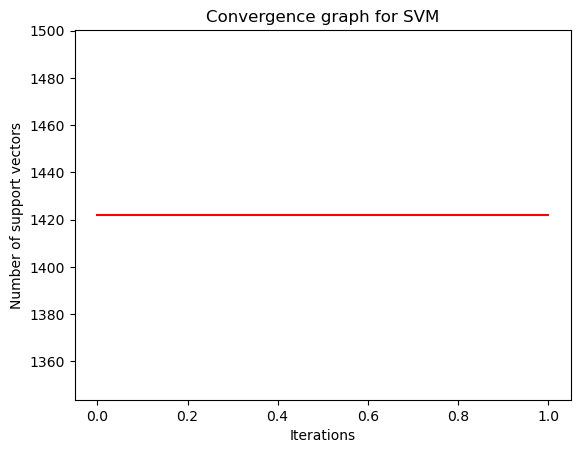

In [9]:
# Plot the convergence graph for the sample whose accuracy is maximum
plt.plot(model.n_support_, 'r-')
plt.xlabel('Iterations')
plt.ylabel('Number of support vectors')
plt.title('Convergence graph for SVM')
plt.show()

In [10]:
# Plot the graph of accuracy vs number of iterations
y_pred = model.predict(X_test)
accuracies = []
n_support = []
for i in range(1, 1001):
    model = NuSVC(kernel='rbf', nu=0.5, max_iter=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    n_support.append(model.n_support_.sum())
    accuracies.append(accuracy)

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

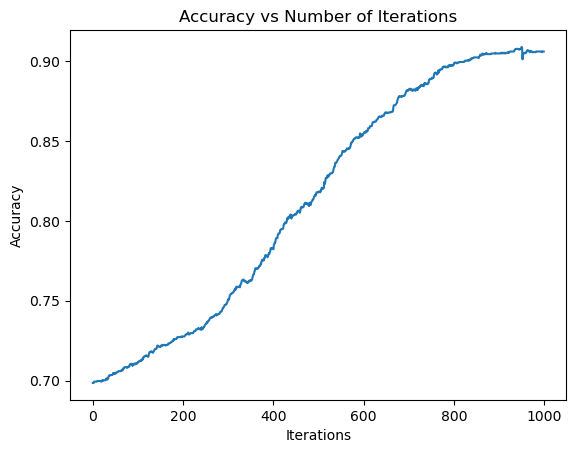

In [12]:
plt.plot(accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Iterations')
plt.show()